# Trend-Following Trading Strategy

A very simple trading strategy is to create fast and slow signals using moving averages of short and long history respectively. Then we buy and hold one share of stock if fast signal is above slow signal, i.e.

Decision: long one share of stock if `fast_signal > slow_signal`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Facebook

Here we implement the trend-following strategy for Facebook, and track the accumulated net profit over time.

In [3]:
fb = pd.read_csv('data/facebook.csv')
fb['fast_signal'] = fb['Close'].rolling(10).mean()
fb['slow_signal'] = fb['Close'].rolling(50).mean()
fb = fb.dropna()
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume,fast_signal,slow_signal
49,2015-03-13,22.559999,22.760000,22.250000,22.700001,22.116024,8982200,22.648,21.0174
50,2015-03-16,22.879999,23.110001,22.730000,22.969999,22.379078,5923900,22.685,21.0758
51,2015-03-17,22.920000,23.260000,22.760000,23.250000,22.651876,7497500,22.792,21.1382
52,2015-03-18,23.250000,23.370001,22.660000,22.870001,22.281652,10337600,22.836,21.1998
53,2015-03-19,22.950001,23.299999,22.780001,23.219999,22.622650,7768900,22.872,21.2804


In [9]:
fb.set_index('Date', inplace=True)

In [4]:
# decision: long one share if fast signal is above slow signal
fb['Shares'] = [1 if fb.loc[ei, 'fast_signal']>fb.loc[ei, 'slow_signal'] else 0 for ei in fb.index]

[]

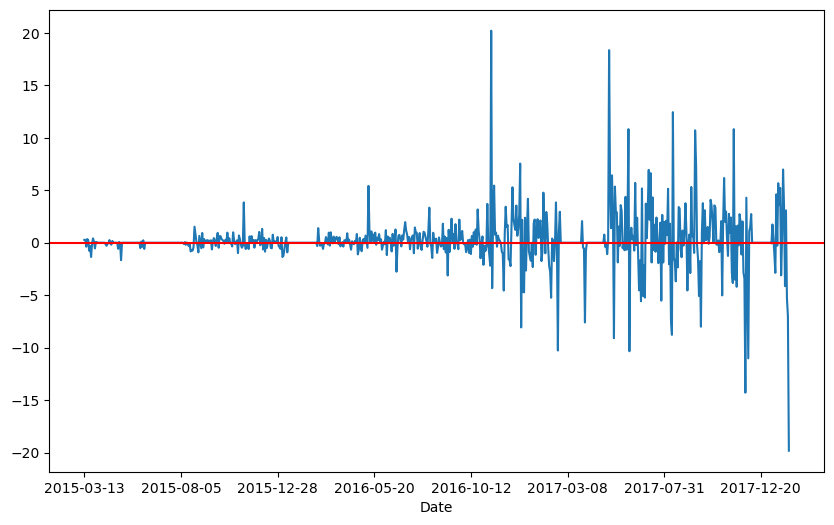

In [12]:
fb['close_tomorrow'] = fb['Close'].shift(-1) # calculate the closing price tomorrow

# profit is closing price tomorrow minus closing price today, if we buy one share
fb['Profit'] = [fb.loc[ei, 'close_tomorrow'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]

# plot the profit and add a horizontal line around y=0
fb['Profit'].plot(figsize=(10, 6))
plt.axhline(y=0, color='red')
plt.plot()

In [8]:
# track the accumulated wealth by cumulative sum of profit
fb['wealth'] = fb['Profit'].cumsum()

# check out the terminal wealth
fb.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,fast_signal,slow_signal,Shares,close_tomorrow,Profit,wealth
775,2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,177.820011
776,2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,172.520008
777,2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,165.540012
778,2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,145.720005
779,2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


[]

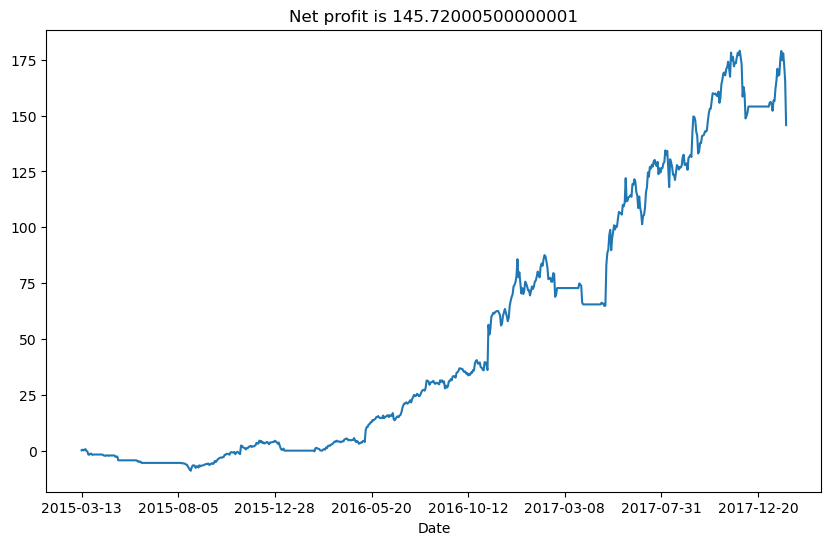

In [15]:
# plot the wealth over time

fb['wealth'].plot(figsize=(10, 6))
plt.title('Net profit is {}'.format(fb.loc[fb.index[-2], 'wealth']))
plt.plot()

## Microsoft

Here we implement the trend-following strategy for Microsoft, and track the accumulated net profit over time.

In [16]:
ms = pd.read_csv('data/microsoft.csv')
ms['fast_signal'] = ms['Close'].rolling(10).mean()
ms['slow_signal'] = ms['Close'].rolling(50).mean()
ms = ms.dropna()
ms.head()

,Date,Open,High,Low,Close,Adj Close,Volume,fast_signal,slow_signal
49,2015-03-13,40.700001,41.470001,40.610001,41.380001,38.443489,58007700,42.495,44.0034
50,2015-03-16,41.470001,41.639999,41.279999,41.560001,38.610714,35273500,42.263,43.9056
51,2015-03-17,41.369999,41.830002,41.150002,41.700001,38.740784,31587200,42.105,43.8044
52,2015-03-18,41.430000,42.830002,41.330002,42.500000,39.484009,43971800,42.049,43.7278
53,2015-03-19,42.259998,42.590000,42.220001,42.290001,39.288918,33879100,41.967,43.6606


In [17]:
ms.set_index('Date', inplace=True)

[]

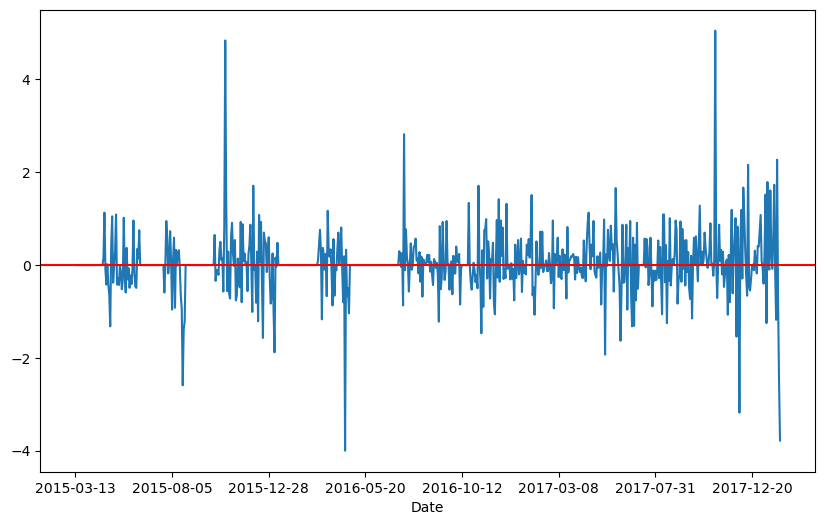

In [18]:
# decision: long one share if fast signal is above slow signal
ms['Shares'] = [1 if ms.loc[ei, 'fast_signal']>ms.loc[ei, 'slow_signal'] else 0 for ei in ms.index]

ms['close_tomorrow'] = ms['Close'].shift(-1) # calculate the closing price tomorrow

# profit is closing price tomorrow minus closing price today, if we buy one share
ms['Profit'] = [ms.loc[ei, 'close_tomorrow'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]

# plot the profit and add a horizontal line around y=0
ms['Profit'].plot(figsize=(10, 6))
plt.axhline(y=0, color='red')
plt.plot()

In [19]:
# track the accumulated wealth by cumulative sum of profit
ms['wealth'] = ms['Profit'].cumsum()

# check out the terminal wealth
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,fast_signal,slow_signal,Shares,close_tomorrow,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,30.540009
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,29.790009
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,27.310006
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,23.530007
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


[]

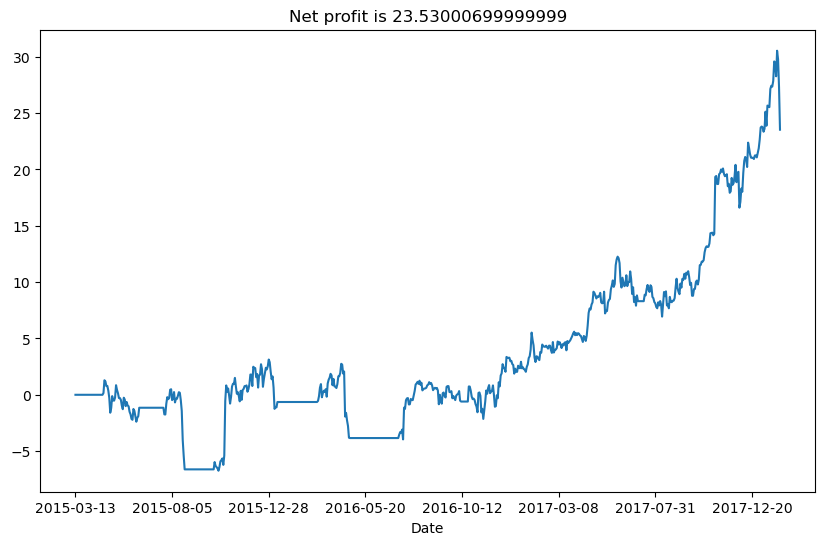

In [20]:
# plot the wealth over time

ms['wealth'].plot(figsize=(10, 6))
plt.title('Net profit is {}'.format(ms.loc[ms.index[-2], 'wealth']))
plt.plot()